In [32]:

import nltk.corpus
import pandas as pd
import numpy as np
import re
import unidecode
import matplotlib.pyplot as plt
import ipywidgets as widgets
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB



In [13]:

stopwords_br = nltk.corpus.stopwords.words('portuguese')
stopwords_br

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [3]:

dataframe = pd.read_excel('base.xlsx')
dataframe.head()

,label,preprocessed_news
0,fake,katia abreu diz vai colocar expulsao moldura n...
1,fake,ray peita bolsonaro conservador fake entrevist...
2,fake,reinaldo azevedo desmascarado policia federal ...
3,fake,relatorio assustador bndes mostra dinheiro pub...
4,fake,radialista americano fala sobre pt vendem ilus...


In [5]:
dataframe.preprocessed_news[0]

'katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilma'

In [10]:
#notícias falsas
dataframe_fake = dataframe[dataframe["label"] == 'fake']

#1. transformar dataframe em uma lista com cada palavra do corpus separado
text = ''.join(word for word in dataframe_fake['preprocessed_news'])

#2. remover stopwords
text_sem_stop = " ".join(word for word in text.split() if word not in stopwords_br)

#3. remover acentos e pontuação
text_sem_pont = unidecode.unidecode(text_sem_stop)
text_sem_pont = re.sub(r'[^\w\s]', '', text_sem_pont)

text_sem_pont[:1000]

'katia abreu diz vai colocar expulsao moldura nao reclamar senadora katia abreu disse expulsao pmdb resultado acao cupula atual legenda segundo oportunista amanha vou botar moldura dourada expulsao porque maos onde veio atestado boa conduta curriculo pessoas expulsaram nao servem pais servem pais beneficios proprios disse katia abreu ue expulsao algo tao bom curriculo tanta choradeira katia sabemos motivo provavelmente katia nao valor pt partido ja deveria absorvido parece pt gostava katia somente ficasse entrincheirada dentro pmdb rebaixar demais resta katia ficar chorando pitangas todos cantos tempo ate momento pt nao cadastrou katia abreu fileiras situacao patetica agricultura dilmaray peita bolsonaro conservador fake entrevista danilo gentili divide direita site vem avisando jair bolsonaro deveria abandonar pauta estatista vez fazer discurso convincente boa parte liberais conservadores brasil querem ver livres amarras estatais tudo bem pesquisas ainda dizem maior parte povo contra 

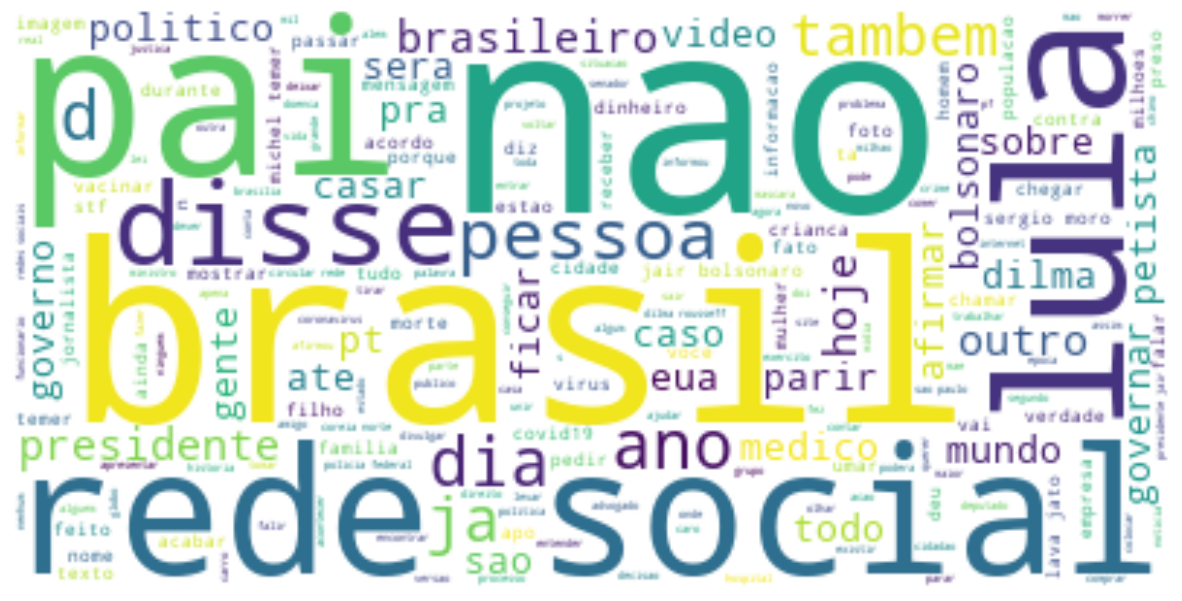

In [14]:
wordcloud = WordCloud(background_color="white").generate(text_sem_pont)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#notícias reais
dataframe_fake = dataframe[dataframe["label"] == 'true']

#1. transformar dataframe em uma lista com cada palavra do corpus separado
text = ''.join(word for word in dataframe_fake['preprocessed_news'])

#2. remover stopwords
text_sem_stop = " ".join(word for word in text.split() if word not in stopwords_br)

#3. remover acentos e pontuação
text_sem_pont = unidecode.unidecode(text_sem_stop)
text_sem_pont = re.sub(r'[^\w\s]', '', text_sem_pont)



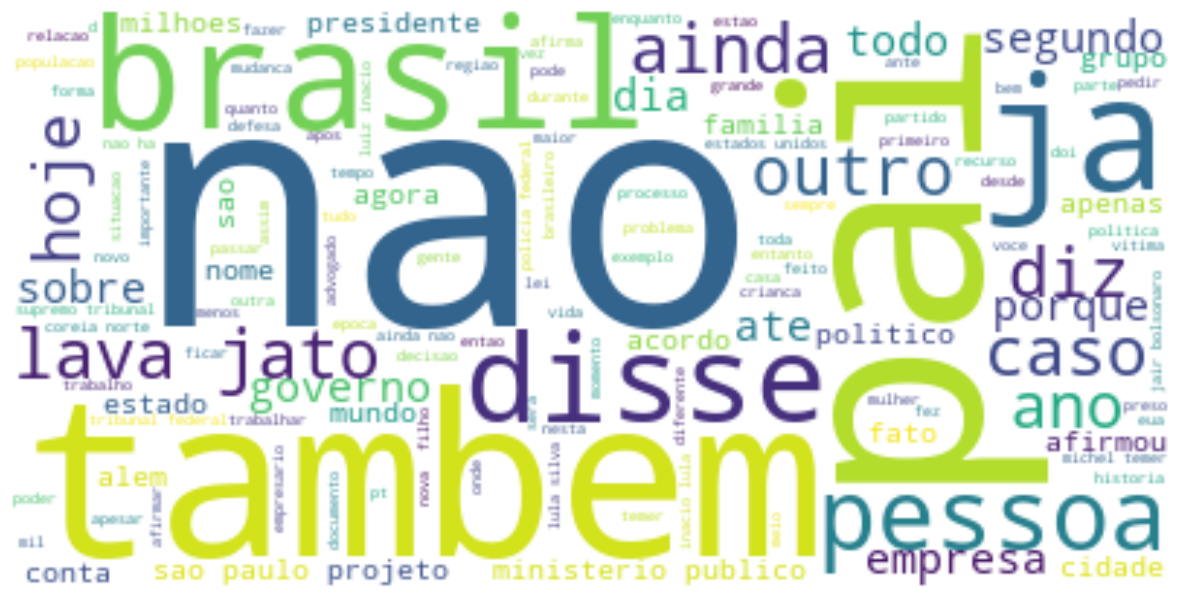

In [17]:
wordcloud = WordCloud(background_color="white").generate(text_sem_pont)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
df_news_labels = dataframe[['preprocessed_news', 'label']]

#remover linhas nulas
df_news_labels = df_news_labels.dropna()

df_news_labels.head()

,preprocessed_news,label
0,katia abreu diz vai colocar expulsao moldura n...,fake
1,ray peita bolsonaro conservador fake entrevist...,fake
2,reinaldo azevedo desmascarado policia federal ...,fake
3,relatorio assustador bndes mostra dinheiro pub...,fake
4,radialista americano fala sobre pt vendem ilus...,fake


In [19]:
news = df_news_labels.preprocessed_news

for i, d in news.items():
    text = " ".join(word for word in d.split())
    text = unidecode.unidecode(text) #remover acentuação
    text = re.sub(r'[^\w$\s]', '', text) #remover pontuação
    news.at[i] = text
    
labels = df_news_labels.label #0 = fake news; 1 = real news

fake    9551
true    9551
Name: label, dtype: int64


<Axes: >

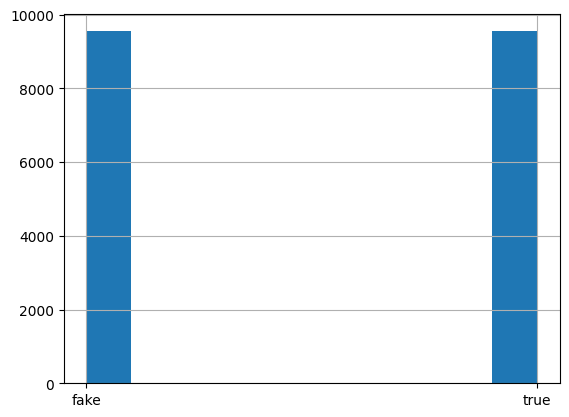

In [20]:
print(labels.value_counts())
labels.hist() #verificar balanceamento

In [22]:
X_train, X_test, y_train, y_test = train_test_split(news, labels, test_size = 0.1)
print(X_test)

18380    o presidente banco central roberto campar neto...
15139    o samsung anunciar n segundafeira celular dobr...
16174    setenta e pais alertar riscar ficar medicament...
5522     delatores dizem ter repassado r milhoes campan...
7422     circular rede social mensagem  o atestar obito...
                               ...                        
10552    o imunizacao estrategia coletiva proteger o so...
16377    o presidente jair bolsonaro n quintafeira deta...
2579     ciro gomes lula mistura politica dinheiro milh...
13154    circular rede social video mostrar urna eletro...
10153    o medico infectologista david uip chefe contin...
Name: preprocessed_news, Length: 1911, dtype: object


In [24]:
bow_model = CountVectorizer(stop_words = stopwords_br)
X_train = bow_model.fit_transform(X_train)
X_test = bow_model.transform(X_test)

In [26]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [27]:
print("Acurácia do treino:", model.score(X_train, y_train))
print("Acurácia do teste:", model.score(X_test, y_test))

Acurácia do treino: 0.719620731778256
Acurácia do teste: 0.6624803767660911


In [28]:
from tqdm import tqdm

sum_train = 0
sum_test = 0
for i in tqdm(range(200)):
    X_train, X_test, y_train, y_test = train_test_split(news, labels, test_size = 0.1)
    bow_model = CountVectorizer(stop_words = stopwords_br)
    X_train = bow_model.fit_transform(X_train)
    X_test = bow_model.transform(X_test)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    sum_train += model.score(X_train, y_train)
    sum_test += model.score(X_test, y_test)

print(sum_train/200, sum_test/200)

100%|██████████| 200/200 [11:39<00:00,  3.50s/it]

0.720265545925193 0.6751151229722658


In [42]:
def predict_text(text):
    text = " ".join(word for word in text.split())
    text = unidecode.unidecode(text)
    text = re.sub(r'[^\w$\s]', '', text)
    X = bow_model.transform([text])
    y_pred = model.predict(X)
    return y_pred

In [43]:
def on_button_clicked(_):
    text = text_input.value
    pred = predict_text(text)
    print(pred)

In [51]:
text_input = widgets.Text(description='Text')
button = widgets.Button(description='Predict')

button.on_click(on_button_clicked)

display(text_input)
display(button)

Text(value='', description='Text')

Button(description='Predict', style=ButtonStyle())

['true']
['true']
['true']
['true']
['true']
['fake']
['fake']
['fake']
['true']
['true']
['fake']
['fake']
['fake']
['fake']
['fake']
['fake']


In [53]:
0 + 0 + 1 + 0 + 0 + 0 + 1 + 0 + 1 + 1 + 1 + 0 + 0 + 0 + 0

5